## Rare Labels Analysis:

We will:

- Learn to identify rare labels .
- Understand the impact of rare labels on the conclusions we derive from the data
- Understand how they may be distributed between training and testing sets.

We will use the House Sale Price dataset.

In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# for splitting
from sklearn.model_selection import train_test_split

In [4]:
# import data
use_cols = ['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice']

data = pd.read_csv('house_price.csv',usecols=use_cols)
data.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,Veenker,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,Crawfor,Wd Sdng,Wd Shng,140000
4,NoRidge,VinylSd,VinylSd,250000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Neighborhood  1460 non-null   object
 1   Exterior1st   1460 non-null   object
 2   Exterior2nd   1460 non-null   object
 3   SalePrice     1460 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 45.8+ KB


In [10]:
# lets find the number of unique labels in each variable

for col in use_cols:
    print('{} : Number of labels : {}'.format(col, data[col].nunique()))
    
print('total len of data ',len(data))

Neighborhood : Number of labels : 25
Exterior1st : Number of labels : 15
Exterior2nd : Number of labels : 16
SalePrice : Number of labels : 663
total len of data  1460


The variable 'Neighborhood' shows 25 different values, 'Exterior1st' shows 15 different categories, and 'Exterior2nd' shows 16 different categories.

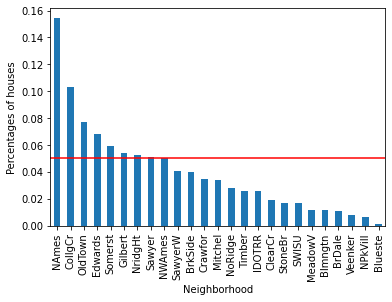

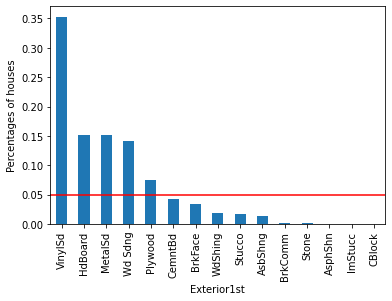

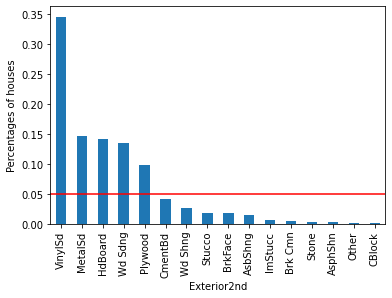

In [18]:
# now lets plot and see how the labels are disctributed for each variable across the total number of houses
cols = ['Neighborhood', 'Exterior1st', 'Exterior2nd']
for col in cols:
    
    temp_df = pd.Series(data[col].value_counts()/len(data))
    
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)
    
    # plot a horizontal line at 5 %
    fig.axhline(y=0.05, color = 'red')
    fig.set_ylabel('Percentages of houses')
    plt.show()
    

Some labels appear in more than 10% of the houses and many appear in less than 10% or even 5% of the houses. These are infrequent labels or **Rare Values** and could cause over-fitting.

## Mean Sale Price in rare labels

I want to understand the mean Sale Price per category.

In [33]:
# The following function calculates:

# 1) the percentage of houses per category.
# 2) the mean SalePrice per category.

#def mean_sal(df,var):
    
total_house = len(data)
var = 'Neighborhood'
per_category = pd.Series(data[var].value_counts()/total_house).reset_index()
per_category.columns = [var,'perc_house']
print(per_category)


mean_sale = data.groupby(data[var])['SalePrice'].mean().reset_index()
print(mean_sale)

temp_df = per_category.merge(mean_sale,on=var,how = 'left')
temp_df.head()

   Neighborhood  perc_house
0         NAmes    0.154110
1       CollgCr    0.102740
2       OldTown    0.077397
3       Edwards    0.068493
4       Somerst    0.058904
5       Gilbert    0.054110
6       NridgHt    0.052740
7        Sawyer    0.050685
8        NWAmes    0.050000
9       SawyerW    0.040411
10      BrkSide    0.039726
11      Crawfor    0.034932
12      Mitchel    0.033562
13      NoRidge    0.028082
14       Timber    0.026027
15       IDOTRR    0.025342
16      ClearCr    0.019178
17      StoneBr    0.017123
18        SWISU    0.017123
19      MeadowV    0.011644
20      Blmngtn    0.011644
21       BrDale    0.010959
22      Veenker    0.007534
23      NPkVill    0.006164
24      Blueste    0.001370
   Neighborhood      SalePrice
0       Blmngtn  194870.882353
1       Blueste  137500.000000
2        BrDale  104493.750000
3       BrkSide  124834.051724
4       ClearCr  212565.428571
5       CollgCr  197965.773333
6       Crawfor  210624.725490
7       Edwards  128219.

,Neighborhood,perc_house,SalePrice
0,NAmes,0.154110,145847.080000
1,CollgCr,0.102740,197965.773333
2,OldTown,0.077397,128225.300885
3,Edwards,0.068493,128219.700000
4,Somerst,0.058904,225379.837209


In [34]:
def mean_sal(data,var):
    
    total_house = len(data)
    per_category = pd.Series(data[var].value_counts()/total_house).reset_index()
    per_category.columns = [var,'perc_house']

    mean_sale = data.groupby(data[var])['SalePrice'].mean().reset_index()

    temp_df = per_category.merge(mean_sale,on=var,how = 'left')
    temp_df.head()
    
    return temp_df

In [66]:
temp_df = mean_sal(data,'Neighborhood')
temp_df

,Neighborhood,perc_house,SalePrice
0,NAmes,0.154110,145847.080000
1,CollgCr,0.102740,197965.773333
2,OldTown,0.077397,128225.300885
3,Edwards,0.068493,128219.700000
4,Somerst,0.058904,225379.837209
5,Gilbert,0.054110,192854.506329
6,NridgHt,0.052740,316270.623377
7,Sawyer,0.050685,136793.135135
8,NWAmes,0.050000,189050.068493
9,SawyerW,0.040411,186555.796610


The dataframe contains the percentage of houses that display each label in Neighborhood, and their mean SalePrice. For example, ~15% of houses are in "NAmes" and their mean SalePrice is 145847.

In [67]:
def plot_categories(temp_df, var):
    fig, ax = plt.subplots(figsize = (10,6))
    ax.bar(temp_df[var], temp_df['perc_house'], color = 'lightgrey')
    plt.xticks(rotation = 90);
    ax.set_ylabel('Percentage of house')
    ax.set_title('Avg House Price per {}'.format(var))
    ax.set_xlabel(var)
    ax2 = ax.twinx()
    ax2.plot(temp_df['SalePrice'],color = 'green')
    ax2.set_ylabel('Average House SalePrice per Category')
    ax.axhline(y=0.05,color = 'red')
    plt.show();

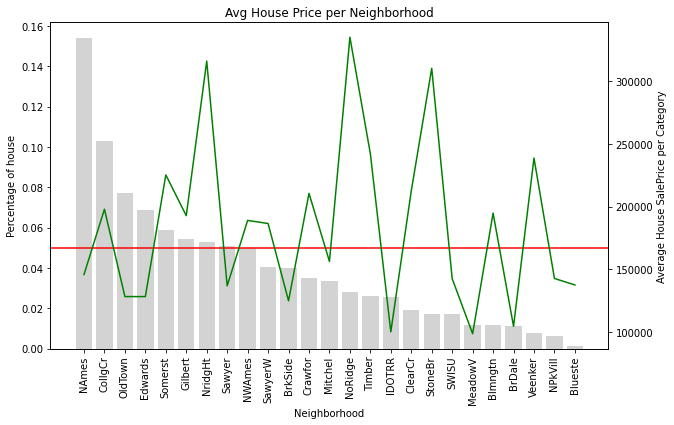

In [68]:
plot_categories(temp_df, 'Neighborhood')

Houses in 'NridgHt' sell at a high price, whereas houses in 'Sawyer' tend to be cheaper.

Houses in StoneBr have on average a high SalePrice, above 300k. However, less than 5% of houses are from StoneBr.

Why is this important? Well, if we only have information for few houses, we could be under or over-estimating the effect of StoneBr on the SalePrice.

How confident can we be to conclude that most houses in StoneBr cost around 300k, when we only have a few houses to learn from?

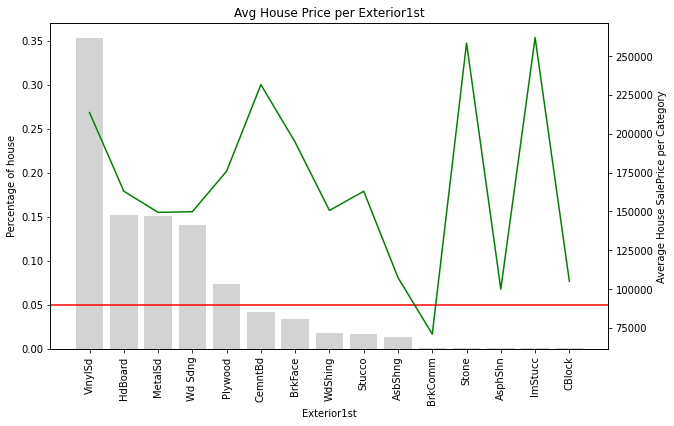

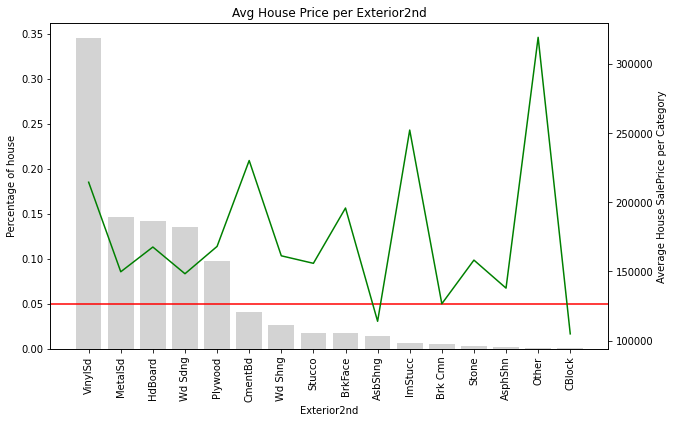

In [69]:
# lets plot for remaining categories
for col in cols:
    if col != 'Neighborhood':
        temp_df = mean_sal(data,col)
        plot_categories(temp_df,col)

Most of the categories in the variable "Exterior2nd" are present in less than 5% of houses. In addition, the "sale price" varies a lot across those rare categories. These rare labels could indeed be very predictive, or they could be introducing noise rather than information. And because the labels are under-represented, we can't be sure whether they have a true impact on the house price. Because we only have information for a few houses, we may be underestimating or overestimating their impact.

**Note:** This plot would bring more value if we plotted the errors of the mean sale price. It would give us an idea of how much the mean value of the target varies within each label. Why don't you go ahead and add the standard deviation to the plot?

## Grouping rare labels

A common way of handling rare values is to group them under an umbrella category called 'Rare' or 'Other'. Like this, we are able to understand their "collective" impact on the target.

In [72]:
df = data.copy()

In [81]:
var = 'Neighborhood'
temp_d = df[var].value_counts()/len(df)
temp_d

NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
Mitchel    0.033562
NoRidge    0.028082
Timber     0.026027
IDOTRR     0.025342
ClearCr    0.019178
StoneBr    0.017123
SWISU      0.017123
MeadowV    0.011644
Blmngtn    0.011644
BrDale     0.010959
Veenker    0.007534
NPkVill    0.006164
Blueste    0.001370
Name: Neighborhood, dtype: float64

In [127]:
def group_rare_labels(df, var):
    
    # First, I calculate the % of houses per category.
    t = df[var].value_counts()/len(df)
    
    # Then, I create a dictionary to replace the rare labels with the
    # string 'rare' (for categories present in less than 5% of houses).
    
    grouping_dict = {
    k : ('rare' if k not in t[t >= 0.05].index else k) for k in t.index
    }
    
    # replace with the rare categories
    temp = df[var].map(grouping_dict)
    
    return temp

In [93]:
data['Neighborhood_grouped'] = group_rare_labels(data, 'Neighborhood')
data['Neighborhood_grouped']

0       CollgCr
1          rare
2       CollgCr
3          rare
4          rare
         ...   
1455    Gilbert
1456     NWAmes
1457       rare
1458      NAmes
1459    Edwards
Name: Neighborhood_grouped, Length: 1460, dtype: object

In [94]:
data[['Neighborhood','Neighborhood_grouped']].head()

,Neighborhood,Neighborhood_grouped
0,CollgCr,CollgCr
1,Veenker,rare
2,CollgCr,CollgCr
3,Crawfor,rare
4,NoRidge,rare


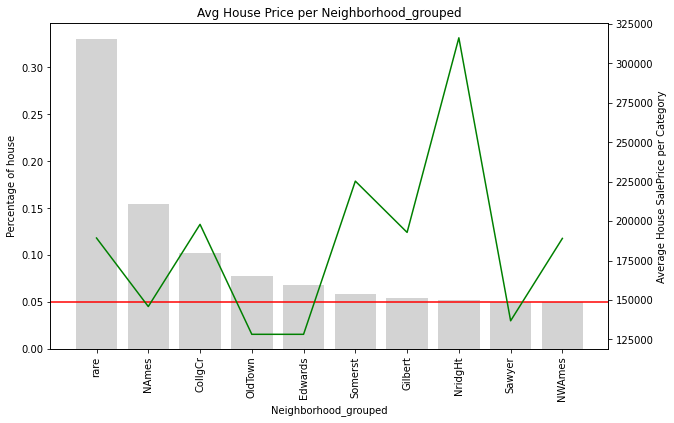

In [95]:
# plotting the neighborhood with the Grouped categories
temp_df = mean_sal(data,'Neighborhood_grouped')
plot_categories(temp_df,'Neighborhood_grouped')

"Rare" now contains the overall influence of all the infrequent categories on the Sale price.

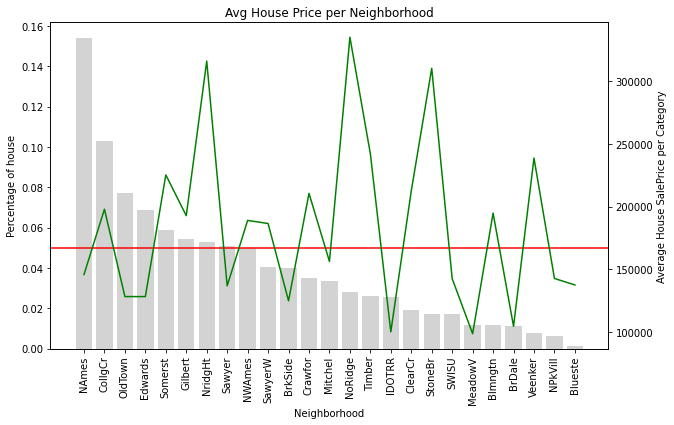

In [96]:
# plotting the neighborhood with the original data for comparison
temp_df = mean_sal(data,'Neighborhood')
plot_categories(temp_df,'Neighborhood')

Only 9 categories of Neighborhood are relatively common in the dataset. The remaining ones are now grouped into 'rare' which captures the average sale price for all the infrequent labels.

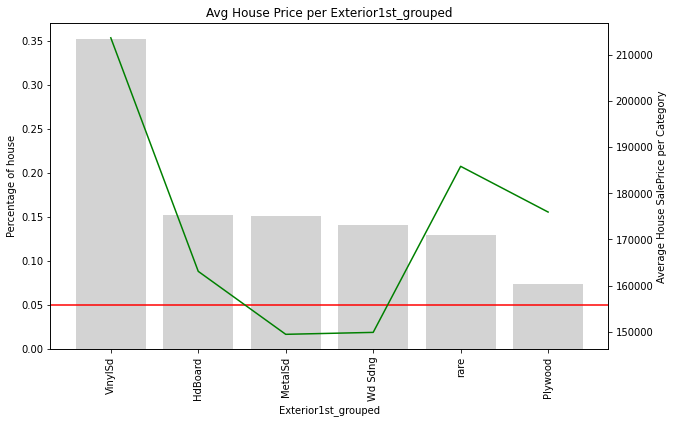

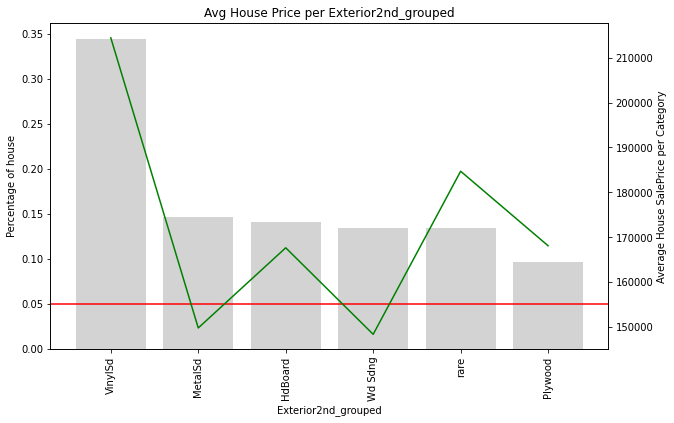

In [129]:
# now lets grouped for other two categories as well

for col in cols:
    if col != 'Neighborhood':
        data[col + '_grouped'] = group_rare_labels(data, col)
        temp_df = mean_sal(data,col + '_grouped')
        plot_categories(temp_df,col + '_grouped')

Note how interesting: In the variable Exterior1st, houses with rare values are on average more expensive (except for those with VinySd). The same is true for Exterior2nd. The rare categories seem to have something in common.

**Note:** Ideally, we would want to plot the standard deviation or inter-quantile range for the sale price to get a better idea of how the categories affect the house price.

## Uneven distribution between train and test sets

Similarly to highly cardinal variables, rare labels often appear only on the training set or only on the testing set. If only in the training set, they may lead to over-fitting. If only in the testing set, machine learning models will not know how to handle them because they were not seen during training.

In [135]:
# separating the data into training and test set

X_train, X_test, y_train, y_test = train_test_split(data[cols],
                                                   data['SalePrice'],
                                                   test_size=0.3,
                                                    random_state=2910)
X_train.shape, X_test.shape

((1022, 3), (438, 3))

In [136]:
# lets find labels presend only in the training set

[i for i in X_train['Exterior1st'].unique() if i not in X_test['Exterior1st'].unique()]

['Stone', 'BrkComm', 'ImStucc', 'CBlock']

- These are 4 categories present only in the Training set

In [137]:
# lets find labels presend only in the test set

[i for i in X_test['Exterior1st'].unique() if i not in X_train['Exterior1st'].unique()]

['AsphShn']

In this case, there is 1 rare value present in the test set only.